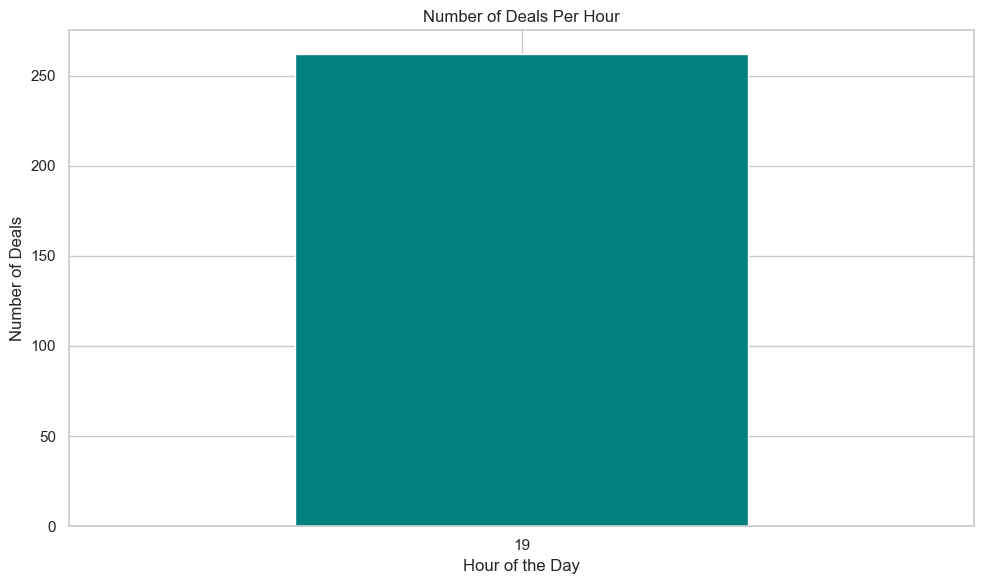

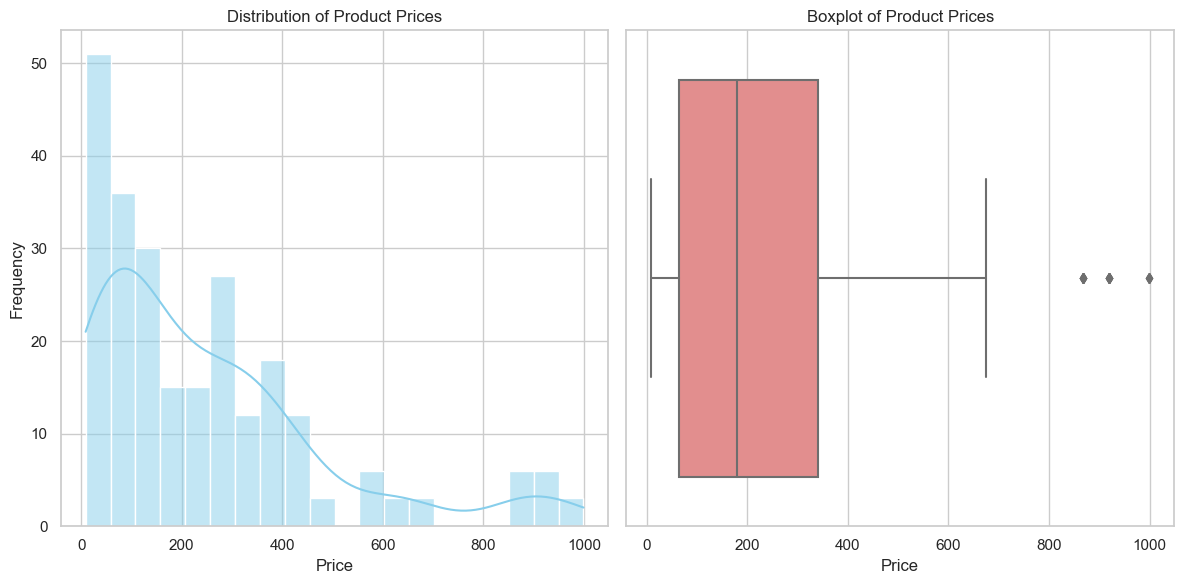

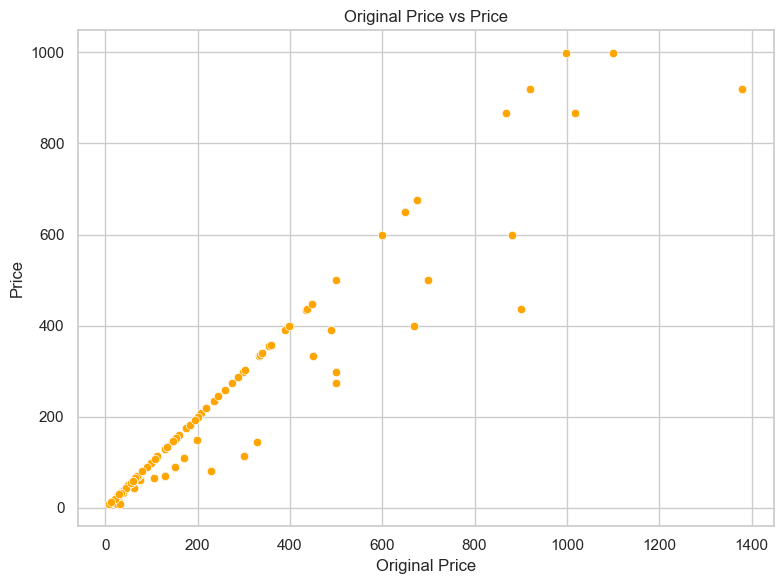

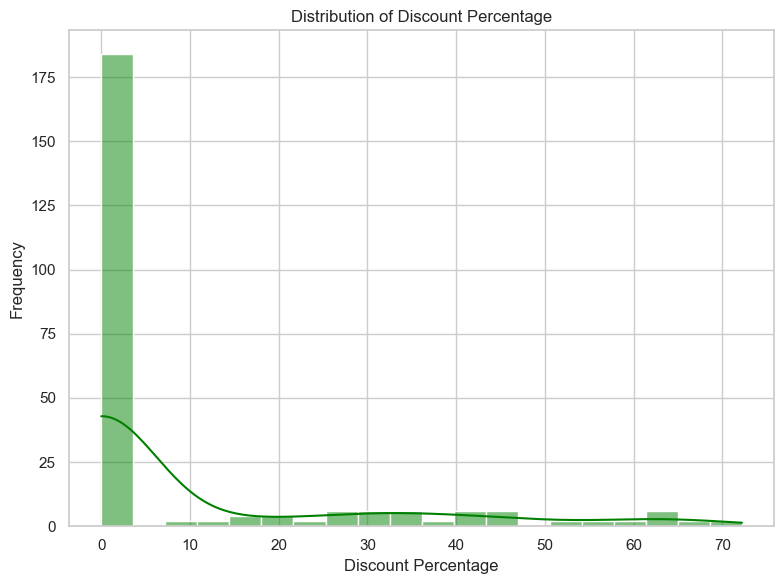

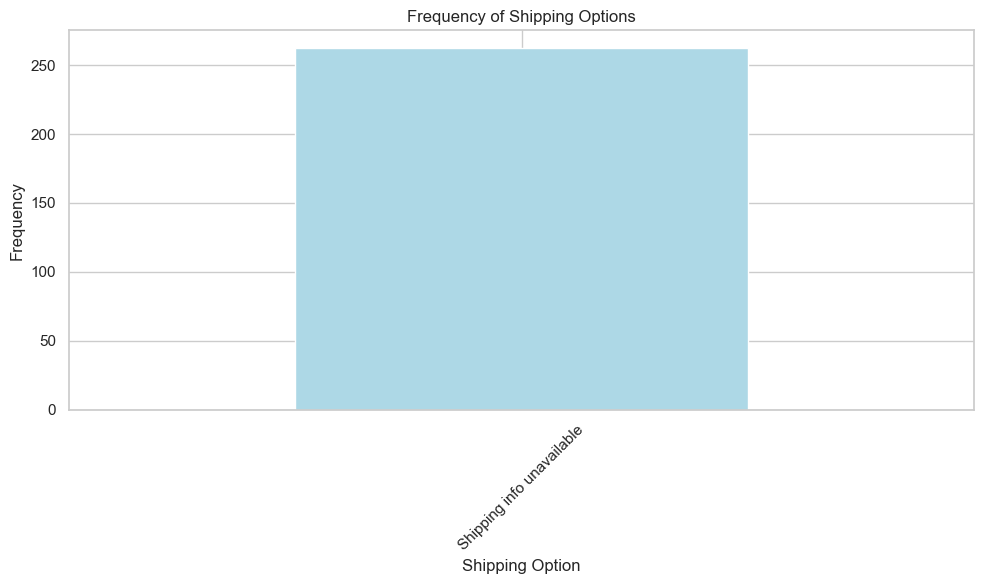

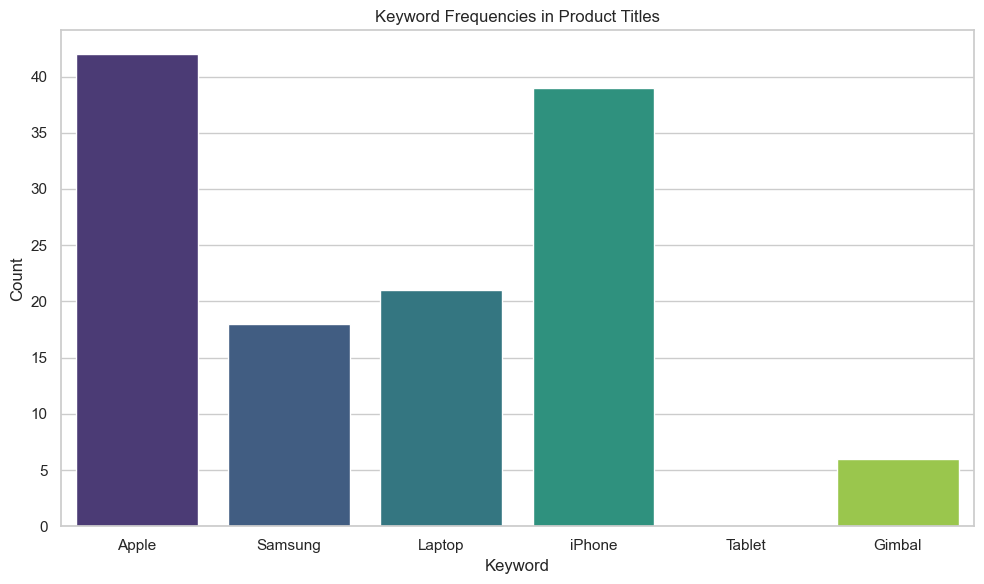

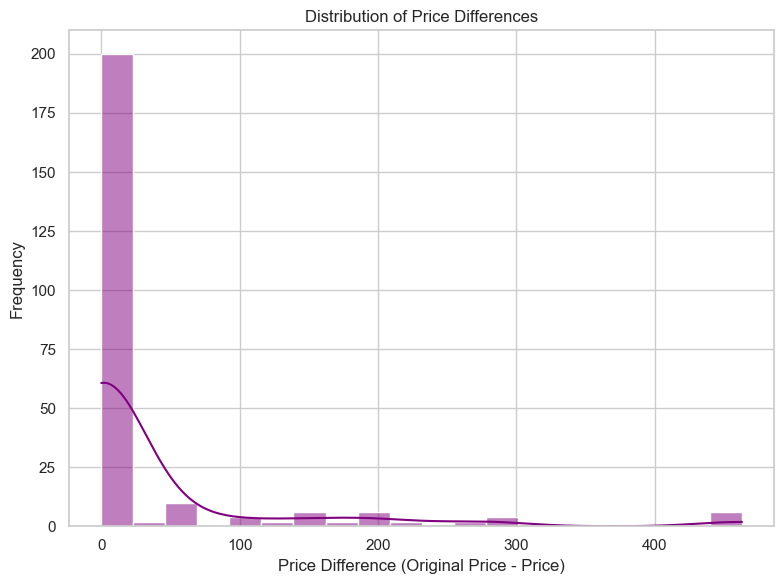

Top 5 Deals with the Highest Discounts:
                                                 title  price  original_price  \
66   Max/Max 2 - White House Hero DVD - BRAND-NEW a...   8.88           31.95   
149  Max/Max 2 - White House Hero DVD - BRAND-NEW a...   8.88           31.95   
57   Soundcore Space Q45 Wireless Headphone Over-Ea...  79.99          229.99   
140  Soundcore Space Q45 Wireless Headphone Over-Ea...  79.99          229.99   
68   Otto the Rhino DVD 2012 Animated English Versi...   8.88           24.95   

     discount_percentage  
66                 72.21  
149                72.21  
57                 65.22  
140                65.22  
68                 64.41  


In [8]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
df = pd.read_csv('cleaned_ebay_deals.csv')

# Set the style for the plots
sns.set(style="whitegrid")

# 1. Time Series Analysis
# Convert timestamp column to datetime and sort the data
# Convert timestamp column to datetime and sort the data, using errors='coerce' to handle invalid formats
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# Drop any rows where 'timestamp' is NaT (if any)
df = df.dropna(subset=['timestamp'])

# Sort the data by timestamp
df = df.sort_values(by='timestamp')


# Extract the hour from each timestamp
df['hour'] = df['timestamp'].dt.hour

# Group data by hour and count the number of deals per hour
hourly_deals = df.groupby('hour').size()

# Plot a bar chart showing the number of deals per hour
plt.figure(figsize=(10, 6))
hourly_deals.plot(kind='bar', color='teal')
plt.title('Number of Deals Per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Deals')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 2. Price and Discount Analysis
# Plot a histogram and boxplot to visualize the distribution of product prices
plt.figure(figsize=(12, 6))

# Histogram of product prices
plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True, color='skyblue', bins=20)
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Boxplot of product prices
plt.subplot(1, 2, 2)
sns.boxplot(x=df['price'], color='lightcoral')
plt.title('Boxplot of Product Prices')
plt.xlabel('Price')

plt.tight_layout()
plt.show()

# Scatter plot comparing original_price vs price
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='original_price', y='price', color='orange')
plt.title('Original Price vs Price')
plt.xlabel('Original Price')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

# Plot the distribution of the discount_percentage
plt.figure(figsize=(8, 6))
sns.histplot(df['discount_percentage'], kde=True, color='green', bins=20)
plt.title('Distribution of Discount Percentage')
plt.xlabel('Discount Percentage')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 3. Shipping Information Analysis
# Count the frequency of different shipping options
shipping_counts = df['shipping'].value_counts()

# Plot a bar chart showing the frequency of shipping options
plt.figure(figsize=(10, 6))
shipping_counts.plot(kind='bar', color='lightblue')
plt.title('Frequency of Shipping Options')
plt.xlabel('Shipping Option')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Text Analysis on Product Titles
# Define a set of keywords
keywords = ['Apple', 'Samsung', 'Laptop', 'iPhone', 'Tablet', 'Gimbal']
keyword_counts = {keyword: df['title'].str.contains(keyword, case=False).sum() for keyword in keywords}

# Create a DataFrame for visualization
keyword_df = pd.DataFrame(list(keyword_counts.items()), columns=['Keyword', 'Count'])

# Plot the keyword frequencies using a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=keyword_df, x='Keyword', y='Count', palette='viridis')
plt.title('Keyword Frequencies in Product Titles')
plt.xlabel('Keyword')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# 5. Price Difference Analysis
# Compute a new column for the absolute discount (original_price - price)
df['price_difference'] = df['original_price'] - df['price']

# Plot a histogram of the price differences
plt.figure(figsize=(8, 6))
sns.histplot(df['price_difference'], kde=True, color='purple', bins=20)
plt.title('Distribution of Price Differences')
plt.xlabel('Price Difference (Original Price - Price)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 6. Discount: Top 5 Deals with Highest Discounts
# Sort the dataset by discount_percentage in descending order and display the top 5 deals
top_5_deals = df.sort_values(by='discount_percentage', ascending=False).head(5)

# Display the top 5 deals
print("Top 5 Deals with the Highest Discounts:")
print(top_5_deals[['title', 'price', 'original_price', 'discount_percentage']])
